<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/main/Copy_of_NB_exercise_2023a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## Write your id numbers and names here


1.   List item
2.   List item


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

to fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0.255] and the corresponding label is an integer $y\in [0,9]$. Each image is should be transformed into a 1D integer array $x\in [0,255]^{784}$.

>```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

Importing Packages


In [7]:
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [2]:
#Load the MNIST data set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

11490434/11490434 [==============================] - 0s 0us/step


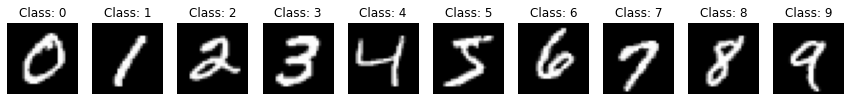

In [5]:
#Plot a single sample of each digit as the original image

for i in range(10):
    im_idx = np.argwhere(y_train == i)[0]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    plt.subplot(2, 10, i + 1)
    plt.imshow(plottable_image, cmap='gray')
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.title(f"Class: {i}")
    plt.axis('off')


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Note:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
Put you answer here...

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

In [85]:
# Imports Answer 2
from scipy.stats import bernoulli


In [4]:
# Fit Bernoulli NB 
naive_bayes_model = BernoulliNB(binarize=0.0).fit(x_train, y_train)

# predict
y_pred = naive_bayes_model.predict(x_test)

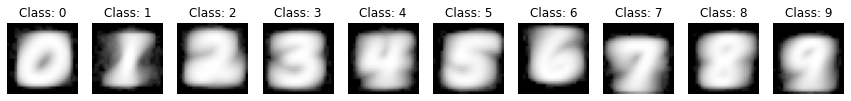

In [6]:
# 1. Plot the mean image of each class 
per_digit_log_probabilities = naive_bayes_model.feature_log_prob_
for i in range(10):
  plt.subplot(3, 10 , i +1)
  plt.imshow(per_digit_log_probabilities[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.title(f"Class: {i}")
  plt.rcParams['figure.figsize'] = [25, 25]
  plt.axis('off')
plt.show()

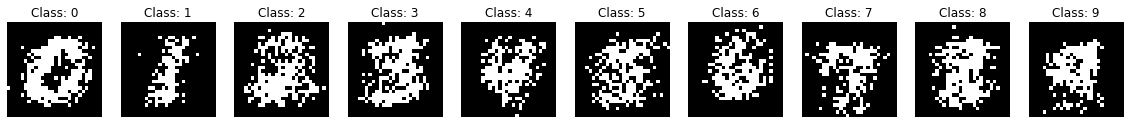

In [8]:
# generate one sample of each class
from scipy.stats import bernoulli
import numpy as np

per_digit_log_probabilities = naive_bayes_model.feature_log_prob_
generated_samples = np.zeros(shape=(10,784))
for i in range(10):
  for j in range(784): 
    generated_samples[i][j] = bernoulli.rvs(pow(2,per_digit_log_probabilities[i][j]), size=1)


for i in range(10):
  plt.subplot(3, 10 , i +1)
  plt.rcParams['figure.figsize'] = [15, 15]
  plt.imshow(generated_samples[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.title(f"Class: {i}")
  plt.axis('off')
plt.show()




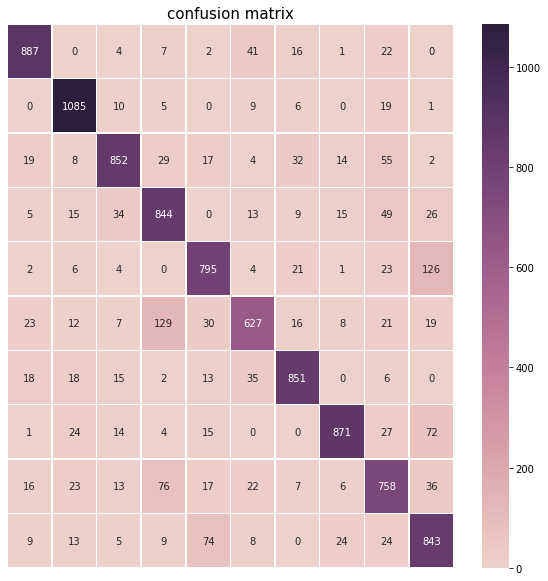

In [12]:
# 2. Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt="d", linewidth=.5)
plt.xlabel('Actual values', fontsize = 10)
plt.ylabel('Predict values', fontsize = 10)
plt.title('confusion matrix', fontsize = 15)
plt.axis('off')
plt.rcParams['figure.figsize'] = [10, 10]

In [14]:
# Calculate the total accuracy 
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8413


 **Explanation:**

summarize the results in your own words:

We can see from the matrix that there are digits that their True prediction values are higher than other digits (Like 1, 0, and 7 compare to 4, 5, and 8). So, we can understand that the low values indicate that the shape of these digits is more complex to predict because there are multi or more complex ways to write them.
Also, it can be understood from the matrix that there are numbers that are probably more similar, so there are relatively many errors in their prediction (e.g., the classification of the number 3 as 5).

In [ ]:
# 3.Optimize threshold of the binarization part

We can use the histogram of the images. The histogram is a graph showing the number of pixels in an image at each different intensity value found in that image.

The pixels in an image that is suitable for thresholding have intensities clustered around two well-separated values.

It is suggested that the threshold for separating these two groups is somewhere between the two peaks shown in the histogram.

Another way to find the optimal threshold for binarization is to use Otsu's method. This method automatically selects the threshold that minimizes the intra-class variance, which is a measure of how spread out the pixel values are within a class (either foreground or background)

In general, the optimal threshold will depend on the specific image and the desired outcome. It may be necessary to try several different thresholds and choose the one that produces the best results for your particular application.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_log_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter,defaultdict
import numpy as np

class NaiveBayes(BaseEstimator, ClassifierMixin):
  def __init__(self):
    self.word_prob_by_class = defaultdict(list) # keep probability for word depends by its class

  def fit(self, x, y):
    x =  x.toarray()
    docs_num, vocabulary_size = x.shape # number of docs, size of vocabulary
    classes_count = Counter(y) # num of classes
    self.vocabulary_size = x.shape[1] # vocabulary size
    # orders by class
    self.classes = list(classes_count.keys())
    self.classes.sort()
    

    # probability for a class (P(c))
    self.pClass = {classs: count / docs_num for classs, count in classes_count.items()} # claculate the prob for each class
    self.len_class = len(self.pClass)


    # probability of a word given a class (P(w,c)):
    word_freq_by_class = {classs: np.zeros((vocabulary_size),dtype=float) for classs in self.classes}
    for classs in range(docs_num): # go over all docs
      word_freq_by_class[y[classs]] += x[classs] 

    # get the number of words for each class (Counter(c))  
    self.count_word_class = {key: sum(value) for key , value in word_freq_by_class.items()}

    # claculate  p(w|c) = (count(w,c) + 1) / (count(c) + |V|)
    for c in self.classes:
      one_lst = [1]*vocabulary_size
      temp = [sum(i) for i in zip(word_freq_by_class[c], one_lst)]  # probability of a word given a class + 1
      temp2 = self.count_word_class[c] + vocabulary_size # divide by the prop for a class and vocabulary size
      self.word_prob_by_class[c] = [x / temp2  for x in temp] # claculate  p(w|c)

  # calculate for each doc the probability of each class
  def predict_log_proba(self, x):      
      probs = []
      num_of_docs = x.shape[0]
      for i in range(num_of_docs):  #iterate on all the docs and check log proba for each class
        log_prob = np.zeros( self.len_class)
        for curr_class in range( self.len_class):
          mul_class = np.power(self.word_prob_by_class[curr_class], x[i]) 
          log_prob[curr_class] = np.sum(np.log(mul_class[mul_class!=0])) + np.log(self.pClass[curr_class]) 
        probs.append(log_prob)

      y_pred = []
      for i in range(x.shape[0]):
        y_pred.append(np.argmax(probs[i]))
      return list(y_pred)

  # using the prediction by the log proba func
  def predict(self, x):
    x = x.toarray()
    return self.predict_log_proba(x)


    

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# load data
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'), shuffle=True)
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), shuffle=True)

# train
X_train = newsgroups_train.data
Y_train = newsgroups_train.target

# test
X_test = newsgroups_test.data
Y_test =  newsgroups_test.target


In [17]:
from sklearn.pipeline import make_pipeline

#Creating pipline for our Naive Bayes model 
pipe = make_pipeline(CountVectorizer(stop_words='english', max_features= 5000), NaiveBayes())

#Fit pipline
pipe.fit(X_train, Y_train)

#Predictions
Y_pred = pipe.predict(X_test)

#Accuracy score
print("Our NaiveBayes accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Our NaiveBayes accuracy:  0.5939989378651088
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       319
           1       0.49      0.69      0.57       389
           2       0.50      0.00      0.01       394
           3       0.46      0.61      0.53       392
           4       0.53      0.64      0.58       385
           5       0.71      0.66      0.69       395
           6       0.76      0.73      0.75       390
           7       0.62      0.69      0.65       396
           8       0.64      0.73      0.68       398
           9       0.72      0.76      0.74       397
          10       0.51      0.71      0.60       399
          11       0.81      0.63      0.70       396
          12       0.58      0.52      0.55       393
          13       0.74      0.65      0.69       396
          14       0.78      0.64      0.70       394
          15       0.55      0.70      0.62       398
          16       0.55      0.60   

In [18]:
from sklearn.naive_bayes import MultinomialNB

#Creating pipline for Skelran Multinomial Naive Bayes model with CountVectorizer
pipe = make_pipeline(CountVectorizer(stop_words='english', max_features= 5000), MultinomialNB())

#Fit pipline
pipe.fit(X_train, Y_train)

#Predictions
Y_pred = pipe.predict(X_test)

#Accuracy score
print("MultinomialNB accuracy: ",accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


MultinomialNB accuracy:  0.5946627721720659
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       319
           1       0.49      0.69      0.57       389
           2       0.50      0.00      0.01       394
           3       0.46      0.61      0.53       392
           4       0.53      0.64      0.58       385
           5       0.71      0.66      0.69       395
           6       0.76      0.73      0.75       390
           7       0.62      0.69      0.65       396
           8       0.64      0.73      0.68       398
           9       0.72      0.76      0.74       397
          10       0.51      0.71      0.60       399
          11       0.81      0.63      0.70       396
          12       0.58      0.52      0.55       393
          13       0.74      0.66      0.69       396
          14       0.78      0.64      0.70       394
          15       0.55      0.70      0.62       398
          16       0.55      0.60    

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

# Compare to TfidfVectorizer preprocessing. using the implemented MultinomialNB model
pipe = make_pipeline(TfidfVectorizer(stop_words='english', max_features= 5000), MultinomialNB())

#Fit pipline
pipe.fit(X_train, Y_train)

#Predictions
Y_pred = pipe.predict(X_test)

#Accuracy score
print("MultinomialNB accuracy with tf_idf preprocessing: ",accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))



MultinomialNB accuracy with tf_idf preprocessing:  0.6505576208178439
              precision    recall  f1-score   support

           0       0.55      0.31      0.40       319
           1       0.57      0.65      0.61       389
           2       0.61      0.62      0.61       394
           3       0.60      0.66      0.63       392
           4       0.71      0.62      0.66       385
           5       0.76      0.73      0.75       395
           6       0.74      0.78      0.76       390
           7       0.70      0.68      0.69       396
           8       0.74      0.71      0.72       398
           9       0.80      0.77      0.78       397
          10       0.55      0.89      0.68       399
          11       0.76      0.70      0.73       396
          12       0.62      0.48      0.54       393
          13       0.75      0.69      0.72       396
          14       0.74      0.69      0.72       394
          15       0.45      0.86      0.59       398
          1

In [20]:
y = Y_train
vec = CountVectorizer(stop_words='english', max_features= 5000)
X = vec.fit_transform(X_train).toarray()

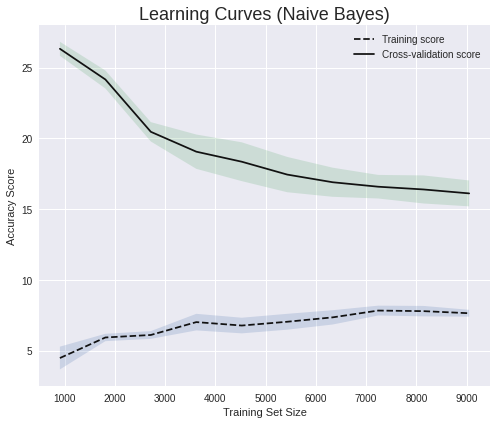

In [21]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(CountVectorizer(stop_words='english'), MultinomialNB())
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.style.use('seaborn')
plt.subplots(1, figsize=(7,6))
plt.plot(train_sizes, -train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, -test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, -(train_mean - train_std), -(train_mean + train_std), alpha=0.2)
plt.fill_between(train_sizes, -(test_mean - test_std), -(test_mean + test_std) , alpha=0.2)

plt.title("Learning Curves (Naive Bayes)", fontsize = 18)
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()



In [22]:
# optimize performance in respect to vectorizer hyper parameters 
pipe = make_pipeline(CountVectorizer(stop_words='english',max_df = 500,min_df = 2 ), MultinomialNB())

#Fit pipline
pipe.fit(X_train , Y_train)

#predictions
Y_pred = pipe.predict(X_test)

#Accuracy score
print(f'Accuracy score: {accuracy_score(Y_test, Y_pred)}')
print(classification_report(Y_test, Y_pred))



Accuracy score: 0.6609134360063728
              precision    recall  f1-score   support

           0       0.56      0.49      0.53       319
           1       0.57      0.72      0.64       389
           2       0.50      0.01      0.01       394
           3       0.53      0.74      0.62       392
           4       0.68      0.65      0.67       385
           5       0.67      0.75      0.71       395
           6       0.78      0.74      0.76       390
           7       0.75      0.71      0.73       396
           8       0.84      0.71      0.77       398
           9       0.92      0.79      0.85       397
          10       0.58      0.90      0.70       399
          11       0.68      0.76      0.72       396
          12       0.67      0.52      0.59       393
          13       0.81      0.78      0.79       396
          14       0.72      0.76      0.74       394
          15       0.56      0.86      0.68       398
          16       0.57      0.68      0.62   

As we can see while tuning the parameters we succedded to get better results. with max_df = 500 and min__df = 2 we get accuracy of 66%.

We improved the model by 2.6% (66% - 63.4%).

#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [1]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color='\x1b[45;37m{}\x1b[0m' 
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [2]:
from sklearn import preprocessing as p

def calc_p_c_given_xi(model):

  # p(c) 
  p_class = np.exp(model.class_log_prior_) 
  
  # p(w|c)
  p_w_c = np.exp(model.feature_log_prob_)  

  # p(wi)
  p_xw = np.multiply(p_class,p_w_c.T)
  p_xi = np.array([sum(i) for i in p_xw])
 
  # p(c|xi) = p(c)p(xi|c)/p(xi)
  pc_xi = np.empty((len(p_class),len(p_w_c[0])))
  for i in range(len(p_class)):
    for j in range(len(p_w_c[0])):
      pc_xi[i][j] = (p_class[i]*p_w_c[i][j])/p_xi[j]
  return   pc_xi     

In [5]:
# lets vectorize the data - from lecture
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectors = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)


In [8]:
#create model and fit
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(df, newsgroups_train.target)
pc_xi = calc_p_c_given_xi(model)
pc_xi_df = pd.DataFrame(pc_xi,columns=feature_names)

#predict class
vectors = vectorizer.transform(newsgroups_test.data)
y_predd = model.predict(vectors.todense().tolist())
best_class_words = pc_xi_df.idxmax().to_dict() 

# index_doc where we didn't predict the class
bad_clss = np.where(newsgroups_test.target != y_predd)[0]

# index_doc where we didn't predict the class
good_clss = np.where(newsgroups_test.target == y_predd)[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [9]:
hot_words = [] # list with duplicates for all hot words
cold_words =[] # list with duplicates for all cold words

for index_doc in range(len(newsgroups_test.data)):
  text = newsgroups_test.data[index_doc].split()
  y_doc = newsgroups_test.target[index_doc]
  y_pred = y_predd[index_doc]
  if index_doc in good_clss: 
    for word in text:
      if word in best_class_words:
        if best_class_words[word] == y_pred:    
             hot_words.append(word)

  if index_doc in bad_clss:
    for word in text:
      if word in best_class_words:
        if best_class_words[word] == y_doc:     
          hot_words.append(word)
        if best_class_words[word] == y_pred:     
          cold_words.append(word)

In [22]:
from collections import Counter

# Counts how many times the word appears
hot_counter = Counter(hot_words)
cold_counter = Counter(cold_words)

# take the most common words
hot = [k[0] for k in hot_counter.most_common()][:40]
cold = [k[0] for k in cold_counter.most_common()][:40]

print("The most important 40 features are:")
print(hot)

The most important 40 features are:
['image', 'people', 'game', 'car', 'available', 'images', 'government', 'believe', 'said', 'file', 'did', 'space', 'say', 'format', 'window', 'color', 'use', 'love', 'software', 'graphics', 'server', 'gun', 'drive', 'think', 'bike', 'know', 'need', 'key', 'vitamin', 'sin', 'medical', 'encryption', 'way', 'time', 'like', 'church', 'team', 'solar', 'run', 'windows']


In [19]:
for txt  in newsgroups_test.data[:20]:
  print_txt(txt, hot, cold)

I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.
I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.


#### Think and describe:
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer goes here